In [7]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert string representation of list to actual list

In [8]:
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_da_us = df_da_us.dropna(subset=['salary_year_avg']) # Drop rows where salary_year_avg is NaN

df_da_us = df_da_us.explode('job_skills')

df_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_da_top_pay = df_us_group.sort_values(by='median', ascending=False).head(10)
df_da_skill_counts = df_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)


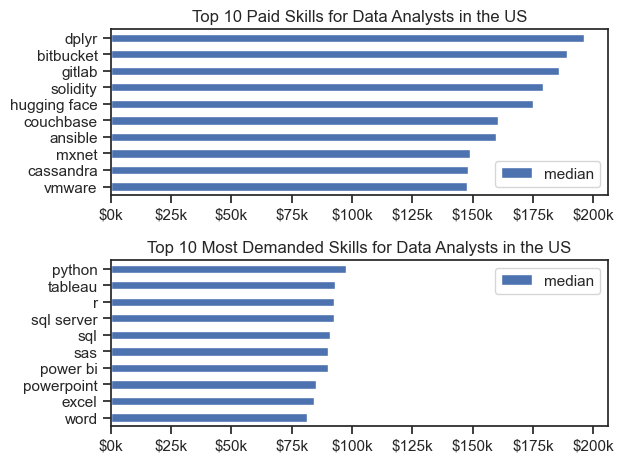

In [ ]:
#plotting using matplotlib

fig, ax = plt.subplots(2, 1)

df_da_top_pay.plot(kind='barh', y='median', ax=ax[0])
ax[0].set_title('Top 10 Paid Skills for Data Analysts in the US')
ax[0].invert_yaxis()  # Invert y-axis to have the highest median salary on top
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}k'))  # Format x-axis labels as currency

df_da_skill_counts[::-1].plot(kind='barh', y='median', ax=ax[1])  # [::-1] is used to reverse the order of the DataFrame so that the skill with the highest count appears at the top of the bar chart.
ax[1].set_title('Top 10 Most Demanded Skills for Data Analysts in the US')
ax[1].set_xlim(ax[0].get_xlim())  # Set the x-axis limits of the second plot to match the first plot for better comparison
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}k'))  # Format x-axis labels as currency

fig.tight_layout() # Adjust layout to prevent overlap
plt.show()


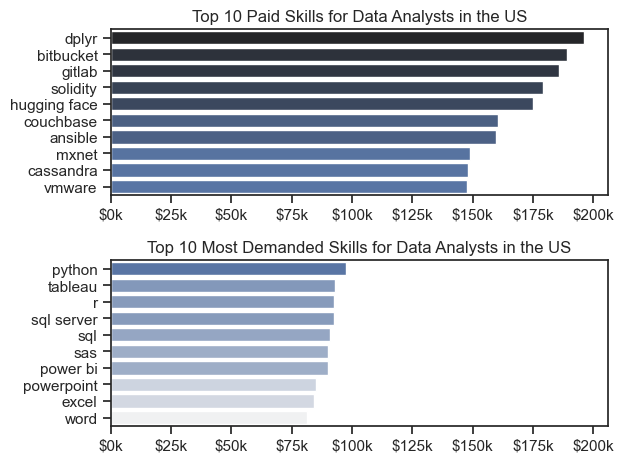

In [ ]:
#plotting using seaborn
 
fig, ax = plt.subplots(2, 1)


sns.set_theme(style='ticks')

# df_da_top_pay.plot(kind='barh', y='median', ax=ax[0])
sns.barplot(data = df_da_top_pay, x='median', y=df_da_top_pay.index, ax = ax[0], hue='median', palette='dark:b_r')
ax[0].set_title('Top 10 Paid Skills for Data Analysts in the US')
ax[0].legend().remove()
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}k'))  # Format x-axis labels as currency

# df_da_skill_counts[::-1].plot(kind='barh', y='median', ax=ax[1])  # [::-1] is used to reverse the order of the DataFrame so that the skill with the highest count appears at the top of the bar chart.
sns.barplot(data = df_da_skill_counts, x='median', y=df_da_skill_counts.index, ax = ax[1], hue='median', palette='light:b')
ax[1].set_title('Top 10 Most Demanded Skills for Data Analysts in the US')
ax[1].set_xlim(ax[0].get_xlim())  # Set the x-axis limits of the second plot to match the first plot for better comparison
ax[1].legend().remove()
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}k'))  # Format x-axis labels as currency

fig.tight_layout() # Adjust layout to prevent overlap
plt.show()


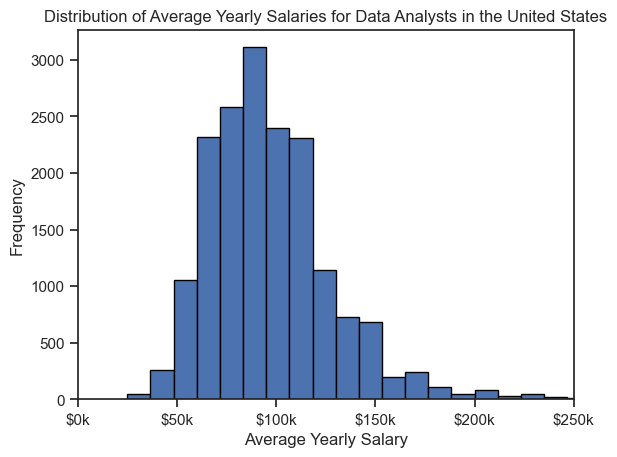

In [ ]:
# plotting using matplotlib

df_da_us['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca() # Get current axes
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k')) # Format x-axis labels as currency
plt.title('Distribution of Average Yearly Salaries for Data Analysts in the United States')
plt.xlabel('Average Yearly Salary')
plt.ylabel('Frequency')
plt.show()

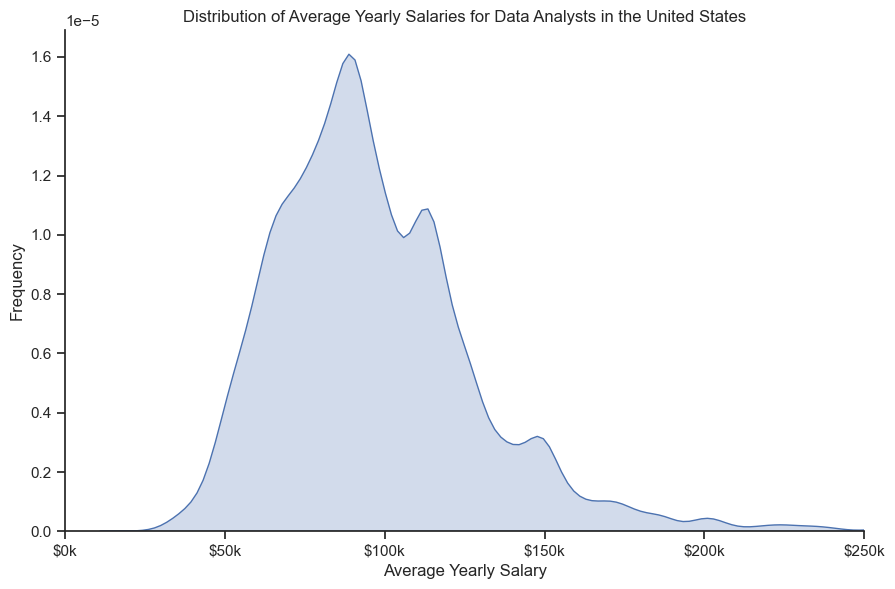

In [26]:
# plotting using matplotlib

#df_da_us['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')


sns.displot(df_da_us['salary_year_avg'], kind='kde', fill=True, height=6, aspect=1.5)
plt.xlim(0, 250000)

ax = plt.gca() # Get current axes
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k')) # Format x-axis labels as currency
plt.title('Distribution of Average Yearly Salaries for Data Analysts in the United States')
plt.xlabel('Average Yearly Salary')
plt.ylabel('Frequency')
plt.show()